# **1-Import libaray**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

# **Introduction**

# **2- Data Loading**

**Load data from google drive** 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/Datasets/Student field Recommendation /Placement_Data_Full_Class.csv")

In [ ]:
data.head()

In [ ]:
data.size

3225

# **3-Preprocessing**

**3.1 Creating Category of Mark Secured in Different Educational Phase**

Here we will create 3 category:
- 85% +
- 60% - 85%
- < 60%



In [29]:
def checkCateg(perct):
    if(perct >= 85):
        return '85% +'
    elif(perct < 85 and perct >= 60):
        return '60% - 85%'
    else:
        return '< 60%'

In [30]:
data['ssc_p_catg'] = data['ssc_p'].apply(checkCateg)
data['hsc_p_catg'] = data['hsc_p'].apply(checkCateg)
data['mba_p_catg'] = data['mba_p'].apply(checkCateg)
data['degree_p_catg'] = data['degree_p'].apply(checkCateg)
data['etest_p_catg'] = data['etest_p'].apply(checkCateg)

In [31]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,ssc_p_catg,hsc_p_catg,mba_p_catg,degree_p_catg,etest_p_catg
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,60% - 85%,85% +,< 60%,< 60%,< 60%
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,60% - 85%,60% - 85%,60% - 85%,60% - 85%,85% +
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,60% - 85%,60% - 85%,< 60%,60% - 85%,60% - 85%
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,< 60%,< 60%,< 60%,< 60%,60% - 85%
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,85% +,60% - 85%,< 60%,60% - 85%,85% +
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0,60% - 85%,60% - 85%,60% - 85%,60% - 85%,85% +
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0,< 60%,60% - 85%,< 60%,60% - 85%,60% - 85%
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,60% - 85%,60% - 85%,60% - 85%,60% - 85%,< 60%
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0,60% - 85%,60% - 85%,60% - 85%,< 60%,60% - 85%


**3.2 -Check Missing Value**


In [9]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
salary,67,0.311628
etest_p_catg,0,0.000000
degree_t,0,0.000000
gender,0,0.000000


In [10]:
data = data.dropna(axis = 0, how ='any') 

In [ ]:
np.sum(data.isnull().any(axis=1))

**3.3-Hot Encoding**

In [46]:
data.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [47]:
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data['ssc_b'] = data['ssc_b'].fillna(data['ssc_b'].mode()[0])
data['hsc_b'] = data['hsc_b'].fillna(data['hsc_b'].mode()[0])
data['hsc_s'] = data['hsc_s'].fillna(data['hsc_s'].mode()[0])
data['degree_t'] = data['degree_t'].fillna(data['degree_t'].mode()[0])
data['workex'] = data['workex'].fillna(data['workex'].mode()[0])
data['specialisation'] = data['specialisation'].fillna(data['specialisation'].mode()[0])
data['status'] = data['status'].fillna(data['status'].mode()[0])
data['ssc_p_catg'] = data['ssc_p_catg'].fillna(data['ssc_p_catg'].mode()[0])
data['hsc_p_catg'] = data['hsc_p_catg'].fillna(data['hsc_p_catg'].mode()[0])
data['mba_p_catg'] = data['mba_p_catg'].fillna(data['mba_p_catg'].mode()[0])
data['degree_p_catg'] = data['degree_p_catg'].fillna(data['degree_p_catg'].mode()[0])
data['etest_p_catg'] = data['etest_p_catg'].fillna(data['etest_p_catg'].mode()[0])







In [48]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    data[col] = lencoders[col].fit_transform(data[col])

In [35]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,ssc_p_catg,hsc_p_catg,mba_p_catg,degree_p_catg,etest_p_catg
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0,0,1,1,2,2
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,0,0,0,0,1
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0,0,0,1,0,0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,NaN,2,2,1,2,0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0,0,0,0,0,1
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0,2,0,1,0,0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0,0,0,0,0,2
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0,0,0,0,2,0


**3.4-Feature Scaling**

In [49]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(data)
data = pd.DataFrame(r_scaler.transform(data), index=data.index, columns=data.columns)

**3.5-Data spliting**


In [50]:
X=data.drop('specialisation',axis=1)


In [51]:
y=data[['specialisation']]


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)


# **Feature Selection**


In [ ]:
!pip install boruta


In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [ ]:
forest = RandomForestRegressor(n_jobs=-1,max_depth=5)


In [ ]:
boruta= BorutaPy(estimator= forest, n_estimators='auto',max_iter=100)
boruta.fit(np.array(X),np.array(y) )

In [ ]:
green_area= X.columns[boruta.support_].to_list()
blue_area= X.columns[boruta.support_weak_].to_list()

In [ ]:
print('Feature in green ara:',green_area)
print('Feature in blue ara:',blue_area)

In [ ]:
#Calculating Features Importance
def Calculating_Entropy(Labels):
    Calculating_Entropy=0
    labelCounts = Counter(Labels)
    for label in labelCounts:
        probability_of_label = labelCounts[label] / len(Labels)
        Calculating_Entropy -= probability_of_label * math.log2(probability_of_label)
    return Calculating_Entropy

In [ ]:
def Calculating_Information_Gain(str_labels, split_labels):
    Calculating_Information_Gain = Calculating_Entropy(str_labels)
    for branch_subset in split_labels:
        Calculating_Information_Gain -= len(branch_subset) * Calculating_Entropy(branch_subset) / len(str_labels)
    return Calculating_Information_Gain

In [ ]:
def data_split_for_label(dataset, column):
    data_split = []
    col_vals = data[column].unique() 
    for col_val in col_vals:
        data_split.append(dataset[dataset[column] == col_val])
    return(data_split)

In [ ]:
from collections import Counter
import math
IN_gain=[]
Feature_Names=[]
def Results_of_Information_Gain(dataset):
    b_gain = 0
    b_feature = 0
    features = list(data.columns)
    features.remove('specialisation')
    for feature in features:
        data_split = data_split_for_label(data, feature)
        labels_split = [dataframe['specialisation'] for dataframe in data_split]
        gain = Calculating_Information_Gain(dataset['specialisation'], labels_split)
        print(' \n')
        print('-------------------------------------------------------------------------------------------------')
        print('-------------------------------------------------------------------------------------------------')
        print(feature)
        print(gain)
        IN_gain.append(gain)
        Feature_Names.append(feature)
        print('-------------------------------------------------------------------------------------------------')
        print('-------------------------------------------------------------------------------------------------')
        if gain > b_gain:
            b_gain, b_feature = gain, feature
    return b_feature, b_gain

new_data = data_split_for_label(data, Results_of_Information_Gain(data)[0])

 

-------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------
sl_no
0.9902246902198684
-------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------
 

-------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------
gender
0.008109850083307224
-------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------
 

-------------------------------------------------------------------------------------------------
--------------------------------------------------------

In [ ]:
IG=pd.DataFrame()
IG['Features Importance']=IN_gain
IG['Features Importance']=round(IG['Features Importance'],2)
IG['Feature']=Feature_Names
IG=IG.sort_values(by=['Features Importance'], ascending=False)

In [ ]:
Features_Group = IG[IG['Features Importance'] > 0.1] 

In [ ]:
print('Length of group features', len(Features_Group))

Length of group features 6


In [ ]:
print('Selected Features in group:\n\n', Features_Group['Feature'])

Selected Features in group:

 0        sl_no
11       mba_p
4        hsc_p
10     etest_p
2        ssc_p
7     degree_p
Name: Feature, dtype: object


In [ ]:
Group_Features_Data=data[list(Features_Group['Feature'])]

In [ ]:
Group_Features_Data

,sl_no,mba_p,hsc_p,etest_p,ssc_p,degree_p
0,0.000000,0.284483,0.889621,0.104167,0.538240,0.195122
1,0.004673,0.564843,0.680890,0.760417,0.792414,0.670244
2,0.009346,0.247001,0.510708,0.520833,0.497011,0.341463
3,0.014019,0.308096,0.247117,0.333333,0.311482,0.048780
4,0.018692,0.160795,0.602965,0.975000,0.925788,0.568293
...,...,...,...,...,...,...
210,0.981308,0.872564,0.741351,0.854167,0.818594,0.673171
211,0.985981,0.090330,0.378913,0.500000,0.352711,0.536585
212,0.990654,0.693778,0.494234,0.187500,0.538240,0.560976
213,0.995327,0.338081,0.477759,0.416667,0.682540,0.195122


**ExtraTreesRegressor**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

In [ ]:
reg= ExtraTreesRegressor()


In [ ]:
reg.fit(X_train,y_train)


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
reg.feature_importances_


array([0.06998361, 0.02502103, 0.05537452, 0.07056676, 0.04918525,
       0.06834832, 0.05082305, 0.08363027, 0.06373431, 0.04981079,
       0.11755081, 0.05611157, 0.06050291, 0.03401852, 0.03000244,
       0.03341113, 0.04932826, 0.03259643])

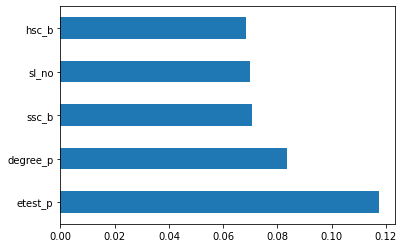

In [ ]:
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

#**Data Exploring**

In [ ]:
data.hist(figsize=(50,50),bins = 20, color="#107009AA")
plt.title("Features Distribution")
plt.show()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data visualization
import seaborn as sb 
from itertools import product
%matplotlib inline

In [ ]:
# Value of count of different Specialization
data['hsc_s'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

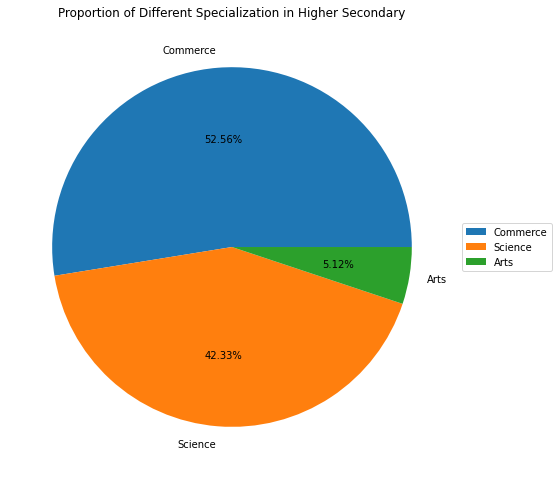

In [ ]:
# Visualization of higher secondary specialization
cls_name = ['Commerce', 'Science', 'Arts']
fig, ax = plt.subplots(figsize = (14.7, 8.27))
wedges, text, autotext = ax.pie(data['hsc_s'].value_counts(), labels = cls_name, autopct = '%1.2f%%')
ax.legend(wedges, cls_name, loc = "center left", bbox_to_anchor =(1, 0, 0.5, 1))
ax.set_title("Proportion of Different Specialization in Higher Secondary");

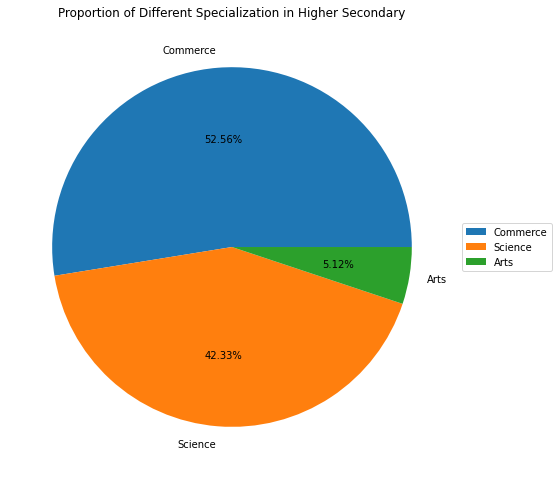

In [ ]:
# Visualization of higher secondary specialization
cls_name = ['Commerce', 'Science', 'Arts']
fig, ax = plt.subplots(figsize = (14.7, 8.27))
wedges, text, autotext = ax.pie(data['hsc_s'].value_counts(), labels = cls_name, autopct = '%1.2f%%')
ax.legend(wedges, cls_name, loc = "center left", bbox_to_anchor =(1, 0, 0.5, 1))
ax.set_title("Proportion of Different Specialization in Higher Secondary");

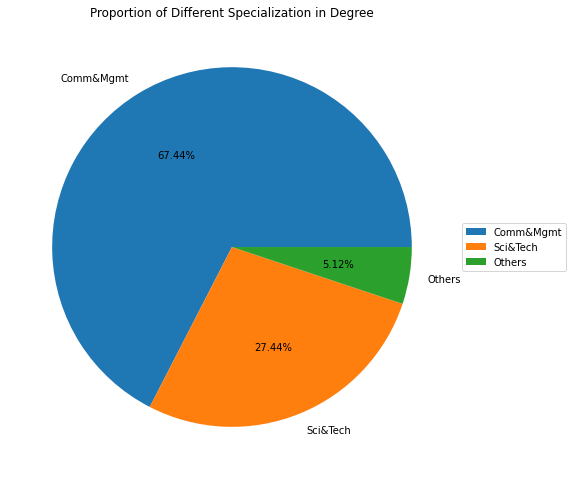

In [ ]:
# Visualization of Degree Specialization
fig, ax = plt.subplots(figsize = (14.7, 8.27))
wedges, text, autotext = ax.pie(data['degree_t'].value_counts(),
                                labels = data['degree_t'].value_counts().index, 
                                autopct = '%1.2f%%')
ax.legend(wedges, data['degree_t'].value_counts().index,
          loc = "center left", bbox_to_anchor =(1, 0, 0.5, 1))
ax.set_title("Proportion of Different Specialization in Degree");

Text(0.5, 1.0, 'Proportion of Different Specialization in Post Graduation')

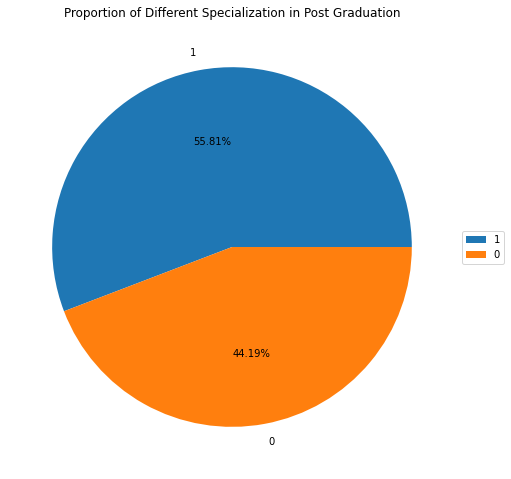

In [ ]:
# Visualization of Postgrad Specialization
fig, ax = plt.subplots(figsize = (14.7, 8.27))
wedges, text, autotext = ax.pie(data['specialisation'].value_counts(),
                                labels = data['specialisation'].value_counts().index, 
                                autopct = '%1.2f%%')
ax.legend(wedges, data['specialisation'].value_counts().index,
          loc = "center left", bbox_to_anchor =(1, 0, 0.5, 1))
ax.set_title("Proportion of Different Specialization in Post Graduation")

In [ ]:
!pip install dtale

In [ ]:
import dtale
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Datasets/Recommended System/Placement_Data_Full_Class.csv")
d = dtale.show(df, ignore_duplicate=True)
d

http://c13ddc6c8837:40000/dtale/main/2

**Pandas Profiling**

In [ ]:
!pip install pandas-profiling

In [ ]:
import pandas as pd
import pandas_profiling
import numpy as np

In [ ]:
pandas_profiling.ProfileReport(data)

**Sweetviz**

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz
import pandas as pd
my_report  = sweetviz.analyze([data,'Train'], target_feat='specialisation')
my_report.show_html('FinalReport.html')

                                             |          | [  0%]   00:00 -> (? left)

Report FinalReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Autoviz**

It stands for Automatically Visualize. Visualization is possible with any size of the dataset with a few lines of code.

In [ ]:
!pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('/content/drive/MyDrive/Datasets/Recommended System/Placement_Data_Full_Class.csv')

#**Implementaion using pycaret**

In [ ]:
!pip install pycaret


In [ ]:
from pycaret.classification import *
clf = setup(data, target = "specialisation",
            ignore_features=["sl_no"], 
            silent = True, session_id = 786)

In [ ]:
compare_models()


# **Statisticlal Operation on Dataset**

In [ ]:
# creating a datasets to illustrate negative correlation.

# importing libraries
import numpy as np
import pandas as pd
import scipy

from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

In [ ]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,ssc_p_catg,hsc_p_catg,mba_p_catg,degree_p_catg,etest_p_catg
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,0,1,1,2,2
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,0,0,0,0,1
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,0,0,1,0,0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,2,2,1,2,0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,0,0,0,0,1
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,2,0,1,0,0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,0,0,0,0,2
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,0,0,0,2,0


In [ ]:
data.describe()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,ssc_p_catg,hsc_p_catg,mba_p_catg,degree_p_catg,etest_p_catg
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,0.646512,67.303395,0.460465,66.333163,0.609302,1.372093,66.370186,0.600000,0.344186,72.100558,0.441860,62.278186,0.688372,0.506977,0.451163,0.376744,0.381395,0.641860
std,62.209324,0.479168,10.827205,0.499598,10.897509,0.489045,0.580978,7.358743,0.890238,0.476211,13.275956,0.497767,5.833385,0.464240,0.847590,0.800809,0.485701,0.781580,0.807162
min,1.000000,0.000000,40.890000,0.000000,37.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.500000,0.000000,60.600000,0.000000,60.900000,0.000000,1.000000,61.000000,0.000000,0.000000,60.000000,0.000000,57.945000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,108.000000,1.000000,67.000000,0.000000,65.000000,1.000000,1.000000,66.000000,0.000000,0.000000,71.000000,0.000000,62.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,161.500000,1.000000,75.700000,1.000000,73.000000,1.000000,2.000000,72.000000,2.000000,1.000000,83.500000,1.000000,66.255000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,215.000000,1.000000,89.400000,1.000000,97.700000,1.000000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000


In [ ]:
corr, pvalue=scipy.stats.pearsonr(data['etest_p_catg'], data['specialisation'])

In [ ]:
print('correlation coefficent', corr)


correlation coefficent -0.011360044406083092


In [ ]:
print('P-value without a notations','{:0.300f}'.format(pvalue))

P-value without a notations 0.868467611116556459371906839805888012051582336425781250000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


#  **4-Model Training**

**Decision Trees**

In [58]:
DTC=DecisionTreeClassifier(random_state=0, max_depth=2)
DTC= DTC.fit(X_train , y_train)
DTC

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [59]:
y_pred_dt = DTC.predict(X_test)
dt=DTC.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(DTC.score(X_test, y_test)))

Accuracy score= 0.5538




confusion matrix


[[10 25]
 [ 4 26]]




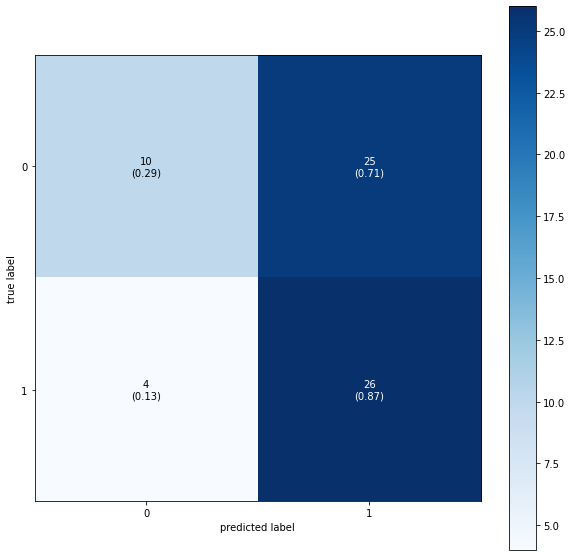

In [60]:
# confusion matrix
print('\n')
print("confusion matrix")
print('\n')
CR_dt=confusion_matrix(y_test, y_pred_dt)
print(CR_dt)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR_dt,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [61]:
#Precision, Recall, F1
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred_dt)
print(CR_dt)
print('\n')



Precision, Recall, F1


[[10 25]
 [ 4 26]]




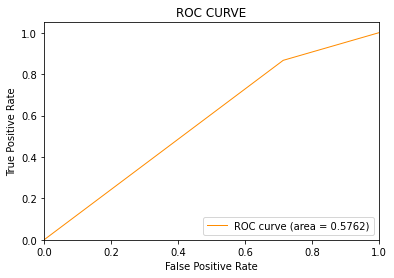

In [62]:
#ROC CURVE
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr_dt, tpr_dt)
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**Random Forest**

In [63]:
Ran_For=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)
Ran_For= Ran_For.fit(X_train , y_train)
Ran_For

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

In [64]:
y_pred_rf = Ran_For.predict(X_test)
rf=Ran_For.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(Ran_For.score(X_test, y_test)))

Accuracy score= 0.7538




confusion matrix


[[28  7]
 [ 9 21]]




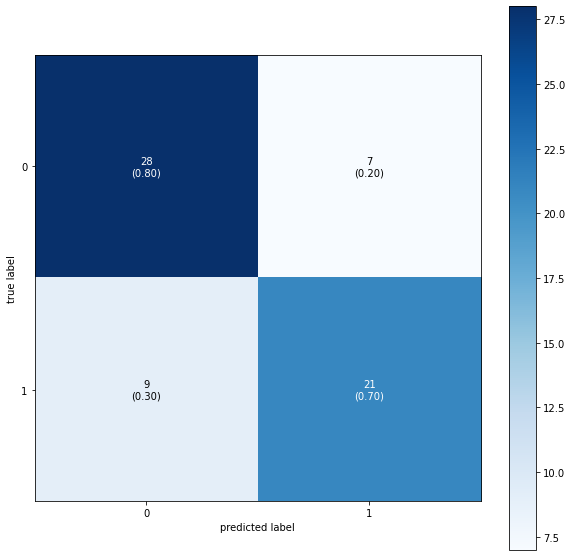

In [65]:
#Confusion Matrix
print('\n')
print("confusion matrix")
print('\n')
CR_rf=confusion_matrix(y_test, y_pred_rf)
print(CR_rf)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR_rf,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [66]:
#Precision, Recall, F1

print('\n')
print("Precision, Recall, F1")
print('\n')
CR_rf=classification_report(y_test, y_pred_rf)
print(CR_rf)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78        35
         1.0       0.75      0.70      0.72        30

    accuracy                           0.75        65
   macro avg       0.75      0.75      0.75        65
weighted avg       0.75      0.75      0.75        65





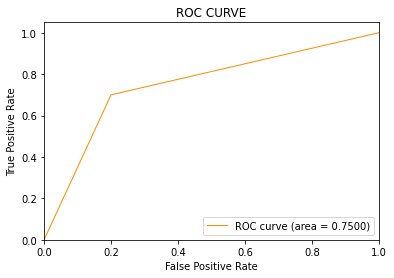

In [67]:
#ROC CURVE
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr_rf, tpr_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**ExtraTreesClassifier**

In [80]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
Extra_TC= clf.fit(X_train , y_train)
Extra_TC

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [81]:
y_pred_EXTC = Extra_TC.predict(X_test)
etc=Extra_TC.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(Extra_TC.score(X_test, y_test)))

Accuracy score= 0.5231




confusion matrix


[[18 17]
 [14 16]]




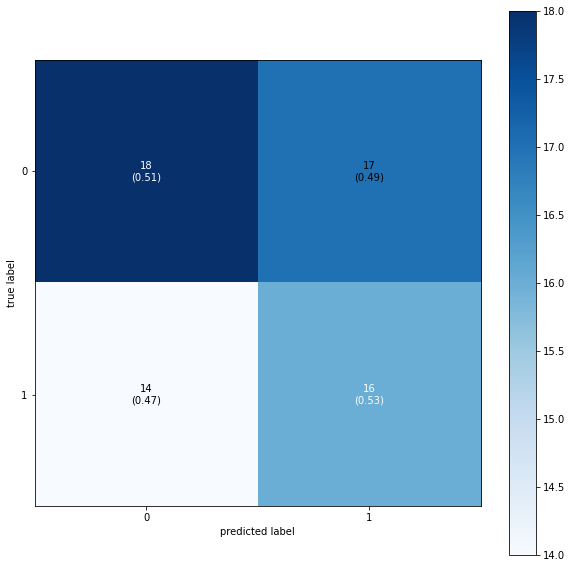

In [82]:
#Confusion Matrix
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred_EXTC)
print(CR)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
show_absolute=True,
show_normed=True,
colorbar=True)
plt.show()

In [71]:
#Precision, Recall, F1

print('\n')
print("Precision, Recall, F1")
print('\n')
CR_etc=classification_report(y_test, y_pred_EXTC)
print(CR_etc)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

         0.0       0.56      0.51      0.54        35
         1.0       0.48      0.53      0.51        30

    accuracy                           0.52        65
   macro avg       0.52      0.52      0.52        65
weighted avg       0.53      0.52      0.52        65





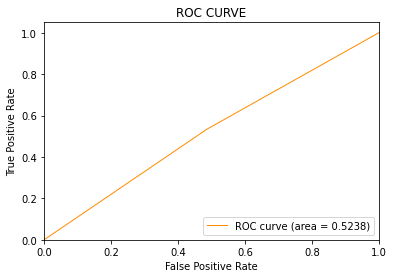

In [83]:
#ROC CURVE
fpr_EXTC, tpr_EXTC, thresholds = roc_curve(y_test, y_pred_EXTC)
roc_auc = auc(fpr_EXTC, tpr_EXTC)
plt.figure()
plt.plot(fpr_EXTC, tpr_EXTC, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**Support Vector Machine (SVM)**

In [73]:
svc=LinearSVC(random_state=0, tol=1e-5)
svc= svc.fit(X_train , y_train)
svc

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [77]:
y_pred_svm = svc.predict(X_test)
sv=svc.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(svc.score(X_test, y_test)))

Accuracy score= 0.6154




confusion matrix


[[22 13]
 [12 18]]




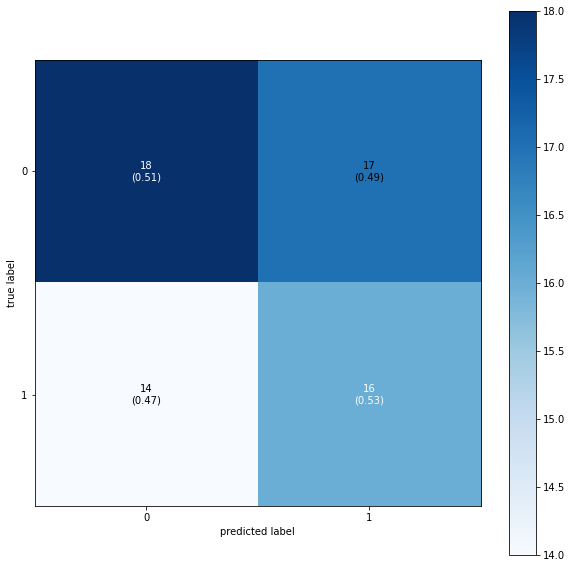

In [ ]:
#Confusion Matrix
print('\n')
print("confusion matrix")
print('\n')
CR_svm=confusion_matrix(y_test, y_pred_svm)
print(CR_svm)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
#Precision, Recall, F1

print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred_svm)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

         0.0       0.65      0.63      0.64        35
         1.0       0.58      0.60      0.59        30

    accuracy                           0.62        65
   macro avg       0.61      0.61      0.61        65
weighted avg       0.62      0.62      0.62        65





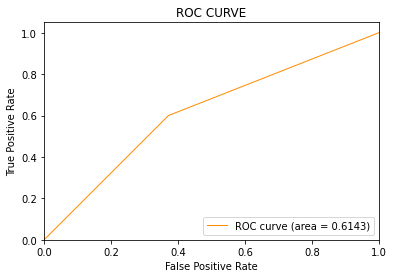

In [78]:
#ROC CURVE
fpr_svm, tpr_svm, thresholds = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr_svm, tpr_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**XGBoost**

In [84]:

from xgboost import XGBClassifier
model_XGBC = XGBClassifier()
GBC=model_XGBC.fit(X_train , y_train)
model_XGBC


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [85]:
y_pred_XGBC = model_XGBC.predict(X_test)
xbc=GBC.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(model_XGBC.score(X_test, y_test)))

Accuracy score= 0.6154




confusion matrix


[[23 12]
 [13 17]]




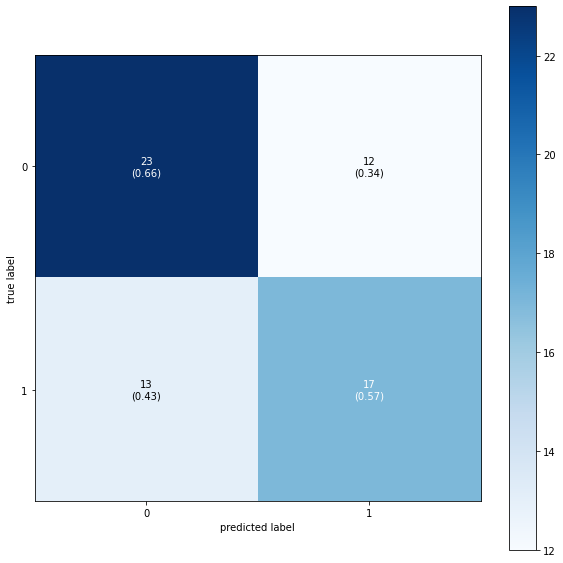

In [ ]:
#Confusion Matrix
print('\n')
print("confusion matrix")
print('\n')
CR_xbc=confusion_matrix(y_test, y_pred_XGBC)
print(CR_xbc)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR_xbc,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
#Precision, Recall, F1

print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred_XGBC)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

         0.0       0.64      0.66      0.65        35
         1.0       0.59      0.57      0.58        30

    accuracy                           0.62        65
   macro avg       0.61      0.61      0.61        65
weighted avg       0.61      0.62      0.61        65





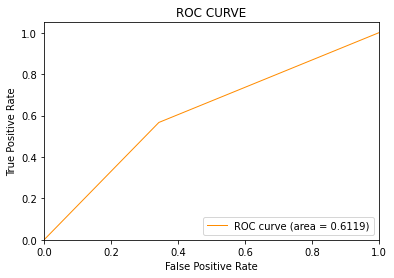

In [86]:
#ROC CURVE
fpr_XGB, tpr_XGB, thresholds = roc_curve(y_test, y_pred_XGBC)
roc_auc = auc(fpr_XGB, tpr_XGB)
plt.figure()
plt.plot(fpr_XGB, tpr_XGB, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# **Compare Modle performance**


**ROC Curve for Models**

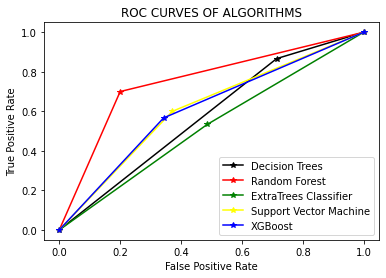

In [89]:
plt.plot(fpr_dt, tpr_dt, marker='*', label='Decision Trees', color = 'black')
plt.plot(fpr_rf, tpr_rf, marker='*', label='Random Forest', color = 'Red')
plt.plot(fpr_EXTC, tpr_EXTC, marker='*', label='ExtraTrees Classifier', color = 'green')
plt.plot(fpr_svm, tpr_svm, marker='*', label='Support Vector Machine', color = 'yellow')
plt.plot(fpr_XGB, tpr_XGB, marker='*', label='XGBoost', color = 'blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES OF ALGORITHMS')
plt.legend(loc="lower right")
plt.show()

**Comparison of all algorithms Results**

In [ ]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Decision Trees Algorithm", round(dt,4)])
x.add_row(["Random Forest Algorithm", round(rf,4)])
x.add_row(["ExtraTreesClassifier", round(et,4)])
x.add_row(["Suport Vector Machine", round(sv,4)])
x.add_row(["XGBoost", round(xbc,4)])
print(x)
print('\n')



Comparison of all algorithm results
+--------------------------+----------+
|          Model           | Accuracy |
+--------------------------+----------+
| Decision Trees Algorithm |  0.5538  |
| Random Forest Algorithm  |  0.7538  |
|   ExtraTreesClassifier   |  0.5231  |
|  Suport Vector Machine   |  0.6154  |
|         XGBoost          |  0.6154  |
+--------------------------+----------+




**References**

[How to Deal with Missing Data in Python](https://towardsdatascience.com/how-to-deal-with-missing-data-in-python-1f74a9112d93)

[Top Python Libraries to Automate Exploratory Data Analysis in 2021](https://www.analyticsvidhya.com/blog/2021/04/top-python-libraries-to-automate-exploratory-data-analysis-in-2021/)

[Campus Recruitement Exploration](https://www.kaggle.com/cs155925/campus-recruitement-exploration)

[Exploring Correlation in Python: Pandas, SciPy](https://re-thought.com/exploring-correlation-in-python/)